<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/skhabiri_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


In [134]:
# df = pd.read_csv(csvfile).drop(self.columns[[0]], axis=1)

df = pd.read_csv ('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv',sep=",", header=0).drop(df.columns[[0]], axis=1)

print(df.shape)
df.head(15)

(2761, 14)


,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
5,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,9-11 years,9-11 years,72469.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,Java;JavaScript;Lua;PHP;Python;Kotlin;HTML;CSS...,Male,25 - 34 years old,White or of European descent
6,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer,3-5 years,3-5 years,33528.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C++;Python;Bash/Shell,Male,25 - 34 years old,White or of European descent
7,No,Employed full-time,"A humanities discipline (ex. literature, histo...","Back-end developer;C-suite executive (CEO, CTO...",18-20 years,15-17 years,83342.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Six months to a year,C#;JavaScript;SQL;HTML;CSS,Male,35 - 44 years old,White or of European descent
8,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Full-stack developer,3-5 years,0-2 years,72500.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,Java;JavaScript;Perl;PHP;Python;Ruby;SQL;HTML;...,Male,25 - 34 years old,White or of European descent
9,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Mobile developer,18-20 years,9-11 years,126403.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Java;Python;Bash/Shell,Male,35 - 44 years old,East Asian


In [135]:
df.isnull().values.any()

False

In [136]:
df.isnull().sum()

Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [137]:
nos1 = 20
nos2 = 200
sample1 = df.sample(nos1, random_state=42)
sample2 = df.sample(nos2, random_state=42)
sample1.head()

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [138]:
df.dtypes

Student                object
Employment             object
UndergradMajor         object
DevType                object
YearsCoding            object
YearsCodingProf        object
ConvertedSalary       float64
EducationTypes         object
SelfTaughtTypes        object
TimeAfterBootcamp      object
LanguageWorkedWith     object
Gender                 object
Age                    object
RaceEthnicity          object
dtype: object

In [139]:
sample1["ConvertedSalary"].mean()

55752.2

In [140]:
sample2["ConvertedSalary"].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

*The bigger sample produce a dataset of sample means with a smaller std, quantified by standard error. hence the 200 sample is potentially a better estimate*

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

*Not really. That information would be furnished based on the standard deviation of population and the size of samples that we want to take.*

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We can use the concept of confidence interval to attach a confidence level to our data. Then plot an error bar or vertical axis bar to depict the accuracy of our estimate

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [141]:

def confidence_interval(sample_data, confidence=.95):
  # Make sure we're working with a numpy array, flexibility of the function argument
  sample = np.array(sample_data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  # first argument is the confidence value of one side of t-test distribution.
  # for the case of 95% is going to be 1-5%/2=0.975 on each side
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error or estimate of the standard deviation of sample mean variable if we take repeated sample data of size n and derive sample mean as a variable
  std_err = s / np.sqrt(n)
  # Margin of Error for a certain confidence level
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)
CI1 = confidence_interval(sample1['ConvertedSalary'])
CI2 = confidence_interval(sample2['ConvertedSalary'])
print(nos1," samples: ", CI1)
print(nos2," samples: ", CI2)


20  samples:  (35805.10309625536, 55752.2, 75699.29690374463)
200  samples:  (60593.058804479086, 68551.255, 76509.45119552092)


In [142]:
len(sample1)-1

19

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [143]:
def mean_moe(sample_data, conf=0.95):
  std = sample_data.std(axis=0, ddof=1)
  std_err = std/np.sqrt(len(sample_data))
  tstat = stats.t.ppf((1+conf)/2, len(sample_data)-1)
  moe = tstat*std_err
  x_bar = sample_data.mean()
  return (x_bar, moe)

mm1 = mean_moe(sample1["ConvertedSalary"], conf=0.95)
mm2 = mean_moe(sample2["ConvertedSalary"], conf=0.95)

print(mm1,"\n",mm2)

(55752.2, 19947.096903744638) 
 (68551.255, 7958.196195520917)


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

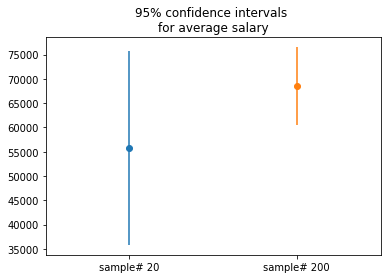

In [144]:
# plt.errorbar
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals \nfor average salary')
plt.xticks(ticks=[0,1], labels=['sample# '+str(nos1), 'sample# '+str(nos2)])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

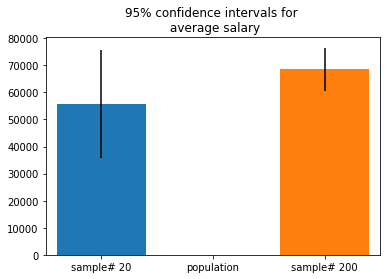

In [145]:
# plt.errorbar
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]));
plt.bar(x=2, height=CI2[1], yerr=(CI2[2]-CI2[1]));
plt.title('95% confidence intervals for \n average salary');
plt.xticks(ticks=[0,1,2], labels=['sample# '+str(nos1),'population', 'sample# '+str(nos2)]);
plt.xlim(-.5, 2.5);


## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

population:  (71299.82986224785, 73453.40420137631, 75606.97854050477)


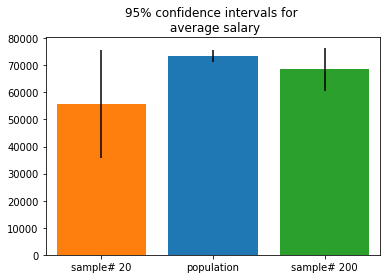

In [147]:
CI = confidence_interval(df['ConvertedSalary'])
print("population: ", CI)
plt.bar(x=1, height=CI[1], yerr=(CI[2]-CI[1]))

plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]));
plt.bar(x=2, height=CI2[1], yerr=(CI2[2]-CI2[1]));
plt.title('95% confidence intervals for \n average salary');
plt.xticks(ticks=[0,1,2], labels=['sample# '+str(nos1),'population', 'sample# '+str(nos2)]);
plt.xlim(-.5, 2.5)

plt.show()

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

*Precision refers to repeatebility of data or tight distribution, while Accuracy refers to the difference of an estimate versus the corresponding parameter in the population.
A small accuracy error yield a small standard error, but a small precision error in the absense of accuracy yields a large standard error*

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

*95% interval says for a given sample size, 95% of times the sampled estimate (such as mean or std) would be withing the confidence interval. That does not necessarily mean the population parameter (mu or sigma) would be in the center of that interval*

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.